<a href="https://colab.research.google.com/github/loveenaw123/Image-Audio-Descriptor/blob/main/IAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import re
import nltk
from nltk.corpus import stopwords
import string
import json
from time import time
import pickle
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive

'AMCAT SCORESHEET FOR STUDENTS (1).xls'
'AMCAT SCORESHEET FOR STUDENTS (2).xls'
'AMCAT SCORESHEET FOR STUDENTS (3).xls'
'AMCAT SCORESHEET FOR STUDENTS.xls'
'Artificial Intelligence Project.gdoc'
 Banker_algo.java
'CG_Assignment_50_10 (1).gdoc'
 CG_Assignment_50_10.gdoc
 CG_Assignment_50_10.pdf
 Classroom
'Colab Notebooks'
'Copy of Oracle_VM_VirtualBox_Extension_Pack-5.2.18 (1).vbox-extpack'
'Copy of rhel-8.0-x86_64-dvd.iso'
'Course Evaluation.gform'
 Data_Test.gsheet
 Data_Test.xlsx
'Drowsiness detection.zip'
'Earrings 2.xlsm'
'Earrings with all links .xlsm'
'Futuristic Background.pptx'
'Getting started.pdf'
'JewellerySetswith links.xlsm'
 LabAssignment1.docx
 LabAssignment1.gdoc
'Loveena Resume.pdf'
'loveenaw_123 Resume (1).gdoc'
'loveenaw_123 Resume (1).pdf'
'loveenaw_123 Resume (2).gdoc'
'loveenaw_123 Resume (3).gdoc'
'loveenaw_123 Resume (4).gdoc'
'loveenaw_123 Resume.gdoc'
'loveenaw_123 Resume.pdf'
 LoveenaWadhwani_50_ESBMod4.pdf
'Loveena Wadhwani_BE_25050_16.pdf'
'Loveena Wadhwan

In [ ]:
model = load_model("/content/gdrive/MyDrive/model_9.h5")

In [ ]:
model_temp = ResNet50(weights="/content/gdrive/MyDrive/resnet50_weights_tf_dim_ordering_tf_kernels.h5",input_shape=(224,224,3))

In [ ]:
model_resnet = Model(model_temp.input,model_temp.layers[-2].output)

In [ ]:
def preprocess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Normalisation
    img = preprocess_input(img)
    return img

In [ ]:
def encode_image(img):
    img = preprocess_img(img)
    feature_vector = model_resnet.predict(img)
    feature_vector = feature_vector.reshape(1,feature_vector.shape[1])
    return feature_vector

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving img3.png to img3.png


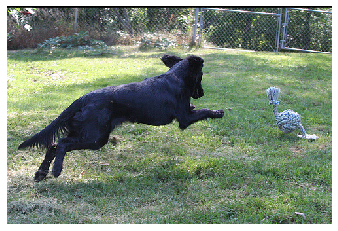

In [ ]:
import cv2
import matplotlib.pyplot as plt
imname = "img3.png"
img = cv2.imread(imname)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
enc = encode_image(imname)

In [ ]:
enc.shape

(1, 2048)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving word_to_idx.pkl to word_to_idx.pkl


In [ ]:
with open("word_to_idx.pkl","rb") as w2i:
  word_to_idx = pickle.load(w2i)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving idx_to_word(1).pkl to idx_to_word(1).pkl


In [ ]:
with open("idx_to_word(1).pkl","rb") as i2w:
  idx_to_word = pickle.load(i2w)

In [ ]:
def predict_caption(photo):
    max_len = 35
    in_text = "startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred = model.predict([photo,sequence])
        ypred = ypred.argmax() #WOrd with max prob always - Greedy Sampling
        word = idx_to_word[ypred]
        in_text += (' ' + word)
        
        if word == "endseq":
            break
    
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [ ]:
fc = predict_caption(enc)

In [ ]:
fc

'black dog is running on the grass'

In [ ]:
!pip install gTTS

In [ ]:
from gtts import gTTS 
from IPython.display import Audio
language = 'en'
myobj = gTTS(text=fc, lang=language, slow=False) 
myobj.save("output.wav") 
sound_file = 'output.wav'
Audio(sound_file, autoplay=True)  

In [ ]:
def sound_this_image(image):
  enc = encode_image(image)
  caption = predict_caption(enc)
  language = 'en'
  myobj = gTTS(text=fc, lang=language, slow=False) 
  myobj.save("output.wav") 
  sound_file = 'output.wav'
  return Audio(sound_file, autoplay=True)  

In [ ]:
sound_this_image("img3.png")